In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Conjunto de datos para probar nuestros algoritmos...
1. Se trata de un conjunto de datos reales sobre el estado de los conocimientos de los estudiantes sobre el tema de las máquinas eléctricas de corriente continua. El conjunto de datos se ha obtenido de la tesis doctoral.
2. User Knowledge Modeling: https://archive-beta.ics.uci.edu/ml/datasets/user+knowledge+modeling (En realidad yo lo he modificado un poco para dejarlo más limpio y trabajar más rápido)
3. Las características son:
- STG (El grado de tiempo de estudio para las materias del objeto de la meta),
- SCG (El grado de repetición del usuario para las materias del objeto de la meta)
- STR (El grado de tiempo de estudio del usuario para los objetos relacionados con el objeto de la meta)
- LPR (El rendimiento en el examen del usuario para los objetos relacionados con el objeto de la meta)
- PEG (El rendimiento en el examen del usuario para los objetos de la meta)
- UNS (El nivel de conocimiento del usuario)

4. Vamos a repetir lo visto en clase con esta data y vamos a verificar que efectivamente nuestro algoritmos pueden identificar los grupos que ellos han identificado. Habrá que definir una métrica para luego medir con que grado de confianza hemos hecho algoritmos que de verdad clasifican bien.

In [2]:
data=pd.read_csv("UserKnowledgeModeling.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5   UNS     403 non-null    object 
dtypes: float64(5), object(1)
memory usage: 19.0+ KB


In [4]:
data.describe()

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360
std,0.212018,0.215531,0.246684,0.257545,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


In [5]:
print(f"La cantidad de datos que estan en el DataFrame son {len(data)}")
print("Tiempo de estudio (normalizado)", ", ".join([f"{x[0]}: {x[1]}" for x in data.describe()['STG'].iteritems()]))

La cantidad de datos que estan en el DataFrame son 403
Tiempo de estudio (normalizado) count: 403.0, mean: 0.35314143920595525, std: 0.2120176406462142, min: 0.0, 25%: 0.2, 50%: 0.3, 75%: 0.48, max: 0.99


In [6]:
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High


5. Lo primero es que vamos a codificar nuestro atributo de clasificación (la última columna). Para ello vamos a hacer algo como lo siguiente:

In [7]:
data["UNS"].value_counts(dropna=False)

Low         129
Middle      122
High        102
Very Low     26
very_low     24
Name: UNS, dtype: int64

homologacion de UNS a numerico

In [8]:
data["UNS"]=data["UNS"].replace("Very Low",0)
data["UNS"]=data["UNS"].replace("very_low",0)
data["UNS"]=data["UNS"].replace("Low",1)
data["UNS"]=data["UNS"].replace("Middle",2)
data["UNS"]=data["UNS"].replace("High",3)
#.....
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,0
1,0.05,0.05,0.55,0.60,0.14,1
2,0.08,0.18,0.63,0.60,0.85,3
3,0.20,0.20,0.68,0.67,0.85,3
4,0.22,0.22,0.90,0.30,0.90,3
...,...,...,...,...,...,...
398,0.61,0.78,0.69,0.92,0.58,3
399,0.78,0.61,0.71,0.19,0.60,2
400,0.54,0.82,0.71,0.29,0.77,3
401,0.50,0.75,0.81,0.61,0.26,2


In [9]:
puntaje_homologacion = {0:"Very Low",1:"Low",2:"Middle",3:"High"}
puntaje_homologacion

{0: 'Very Low', 1: 'Low', 2: 'Middle', 3: 'High'}

In [10]:
data["UNS"].value_counts(dropna=False).sort_index()

0     50
1    129
2    122
3    102
Name: UNS, dtype: int64

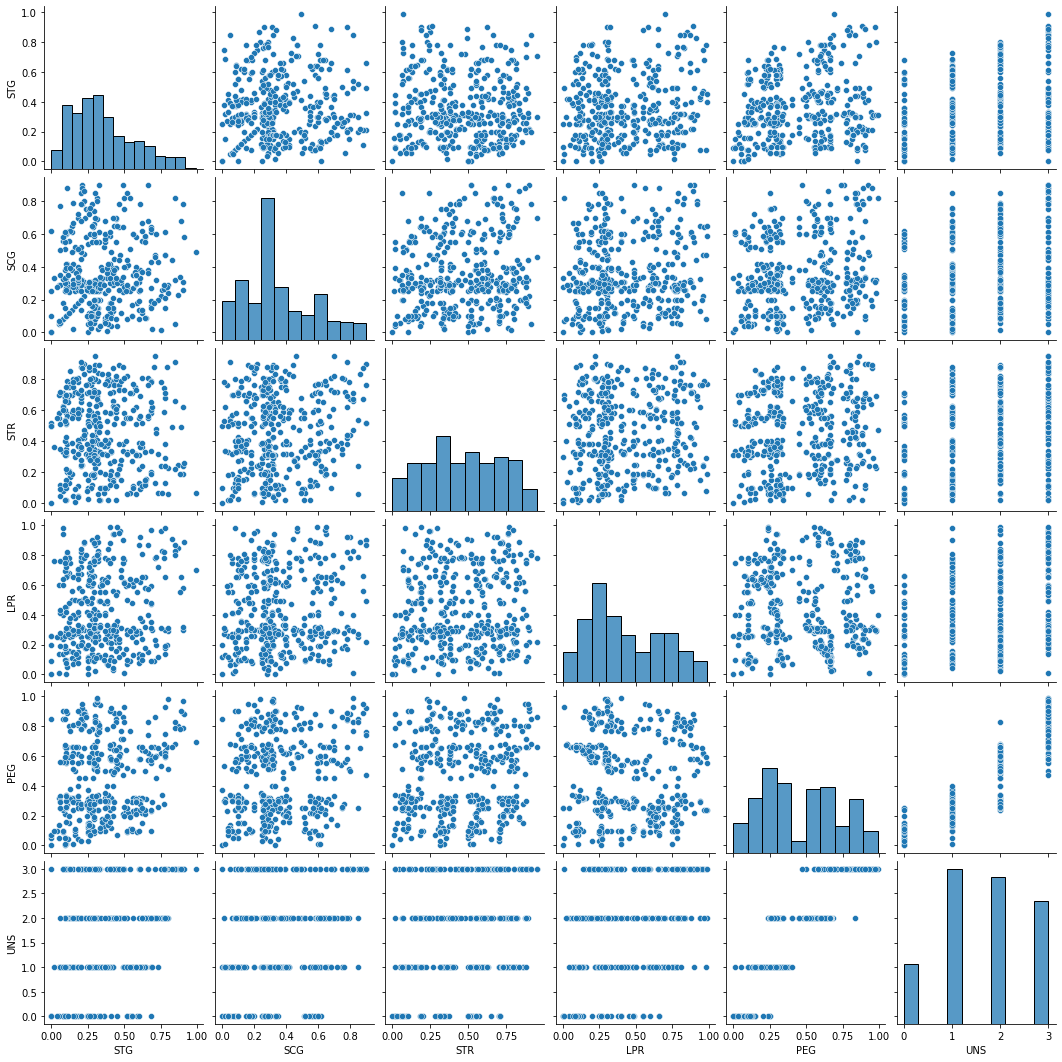

In [11]:
sns.pairplot(data, aspect=1)

6. Por ahora nos olvidamos de la columna `UNS` y hacemos nuestros algoritmos de agrupamiento y clustering y luego vemos que tan fiable han sido nuestro modelos

# Tarea
Vamos a aplicar los algorimos para nuestros conjuntos de datos `data`
1. K-Means
2. Clustering jerarquico
3. DBSCAN
4. Shif Mean

In [12]:
target = "UNS"

colsX = list([c for c in data if c!=target])

print(f"Elementos para realizar el cluster: {', '.join(colsX)}")

Elementos para realizar el cluster: STG, SCG, STR, LPR, PEG


In [13]:
data[colsX]

,STG,SCG,STR,LPR,PEG
0,0.00,0.10,0.50,0.26,0.05
1,0.05,0.05,0.55,0.60,0.14
2,0.08,0.18,0.63,0.60,0.85
3,0.20,0.20,0.68,0.67,0.85
4,0.22,0.22,0.90,0.30,0.90
...,...,...,...,...,...
398,0.61,0.78,0.69,0.92,0.58
399,0.78,0.61,0.71,0.19,0.60
400,0.54,0.82,0.71,0.29,0.77
401,0.50,0.75,0.81,0.61,0.26


## 1. Aplicando `K-Means`

Grafica del codo `Elbow`

In [14]:
def make_elbow_graph(data,max_iter):
    from sklearn.cluster import KMeans
    clusters = []
    for i in range(1, max_iter):
        km = KMeans(n_clusters=i).fit(data[colsX])
        clusters.append(km.inertia_)
        
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(x=list(range(1, max_iter)), y=clusters, ax=ax, marker="o")
    ax.set_title('Searching for Elbow')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Inertia')
    plt.show()
    return clusters

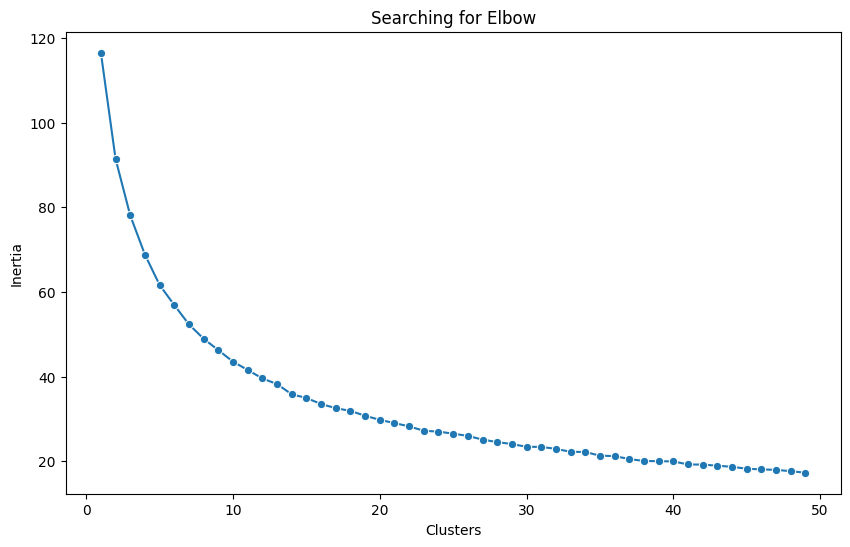

In [15]:
k_mean_clusters = make_elbow_graph(data=data[colsX],max_iter=50)

In [16]:
# t = pd.DataFrame(k_mean_clusters)
# t['n-1'] = t[0].shift(1)
# t['dif'] = t['n-1'] - t[0]
# t['dif%'] = (t['n-1'] - t[0])/t[0]
# t

Se prefiere el cluster donde la diferencia el delta de Y disminuye

In [17]:
def make_cluster_with_kmeans(data,cols,n,x1,x2):
    
    from sklearn.cluster import KMeans

    km = KMeans(n_clusters=n).fit(data[cols])
    data[f'Labels_k{n}'] = km.labels_
    plt.figure(figsize=(8, 8))
    g = sns.scatterplot(data[x1], data[x2], hue=data[f'Labels_k{n}'], palette=sns.color_palette('tab10', n), s=100, alpha=0.7)
    g = plt.title(f'KMeans with {n} Clusters')
    plt.show();
    return data

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


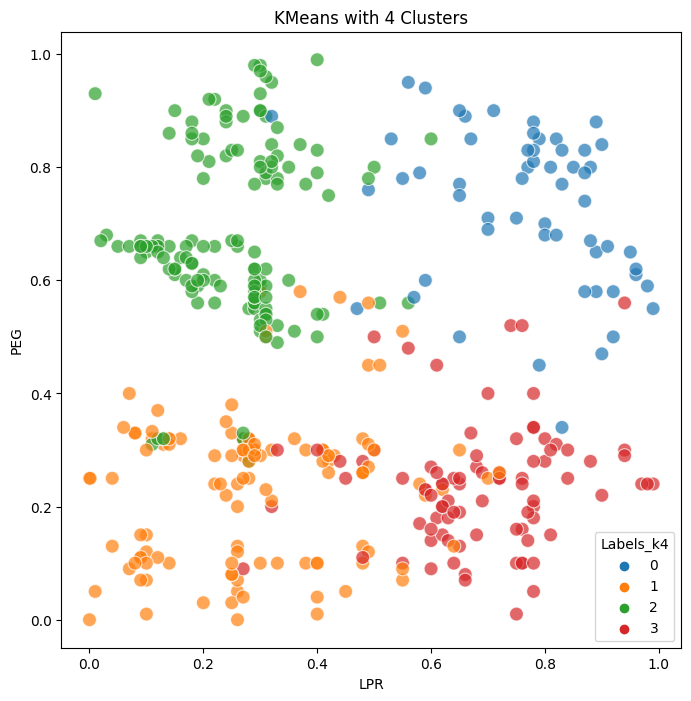

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


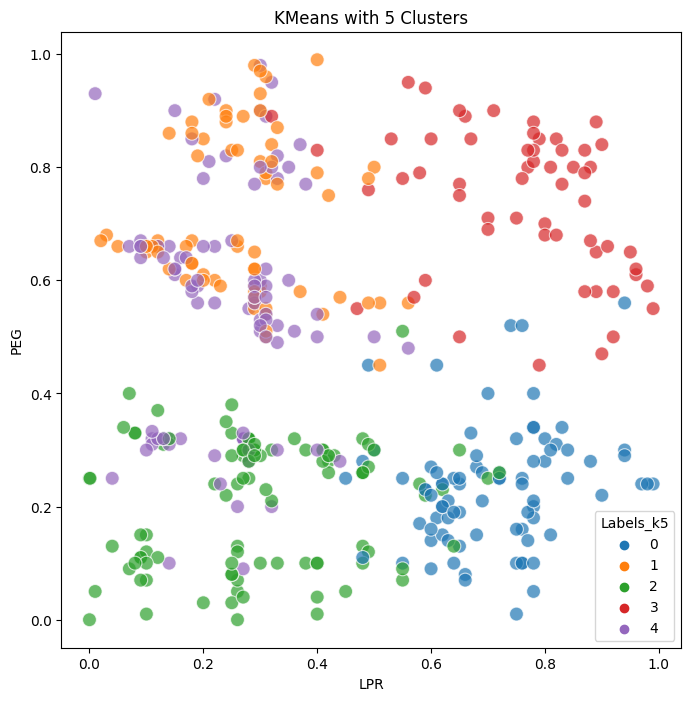

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


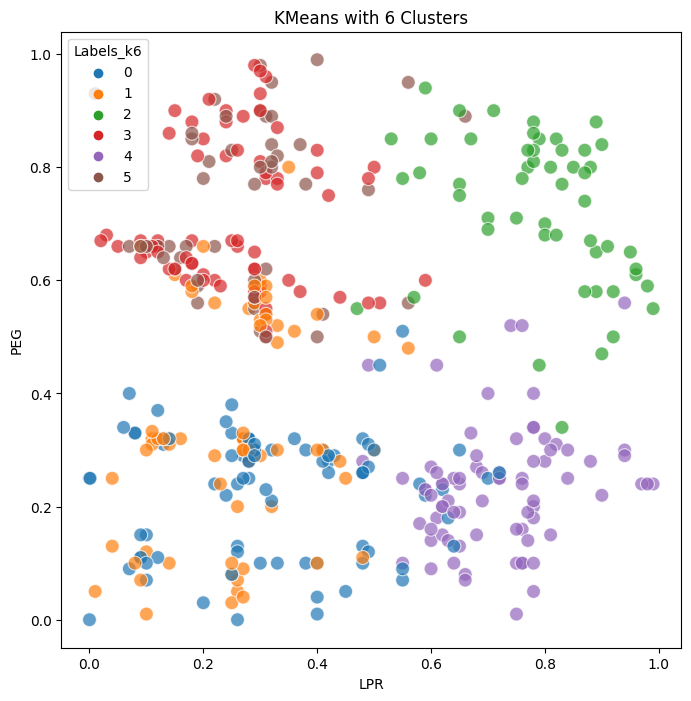

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


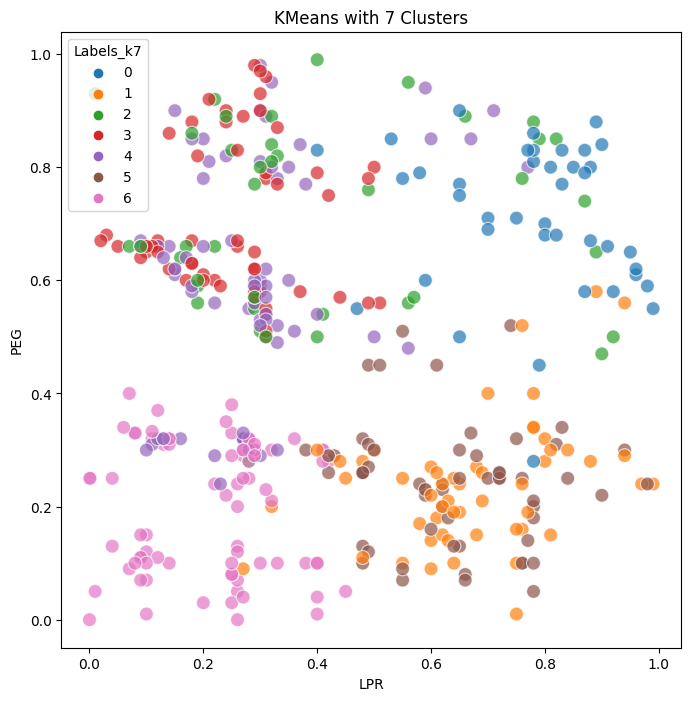

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


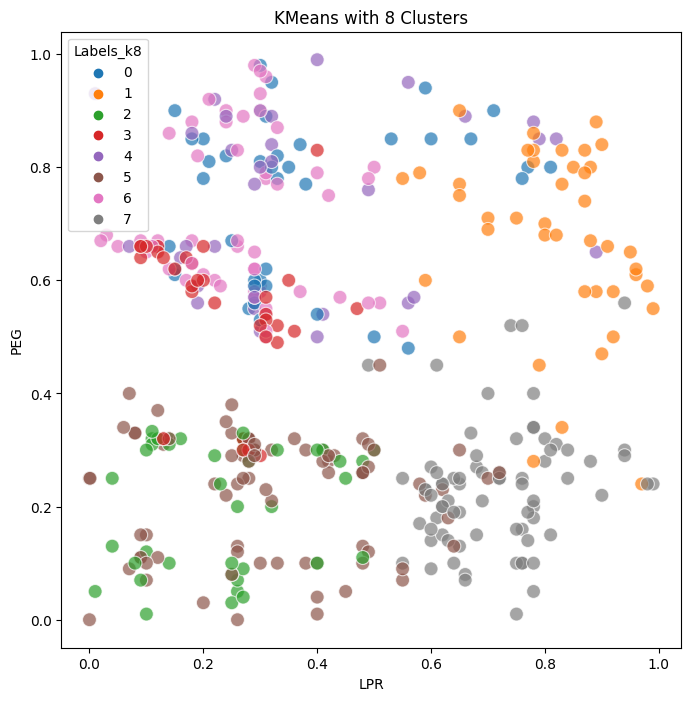

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


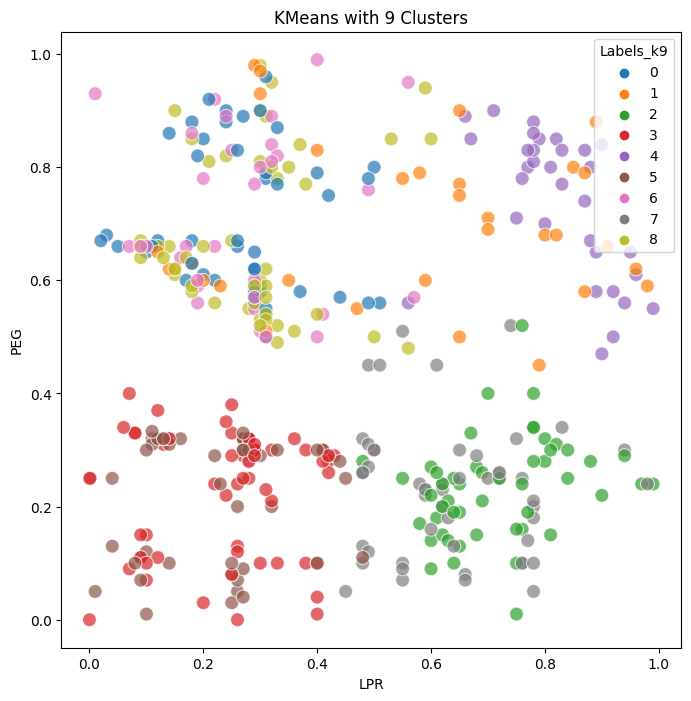

In [18]:
for n in range(4,10):
    make_cluster_with_kmeans(data=data,cols=colsX,n=n,x1="LPR",x2="PEG")

## 2. Aplicando `Cluster Jerarquico`

In [19]:
def make_cluster_with_agglomerative(data,cols,n,x1,x2):
    from sklearn.cluster import AgglomerativeClustering 

    agglom = AgglomerativeClustering(n_clusters=n, linkage='average').fit(data[cols])

    labn = f'Labels_a{n}'
    data[labn] = agglom.labels_
    plt.figure(figsize=(8, 8))
    g = sns.scatterplot(data[x1], data[x2], hue=data[labn], palette=sns.color_palette('tab10', n), s=100, alpha=0.7)
    plt.title(f'Agglomerative with {n} Clusters')
    plt.show()
    return g

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


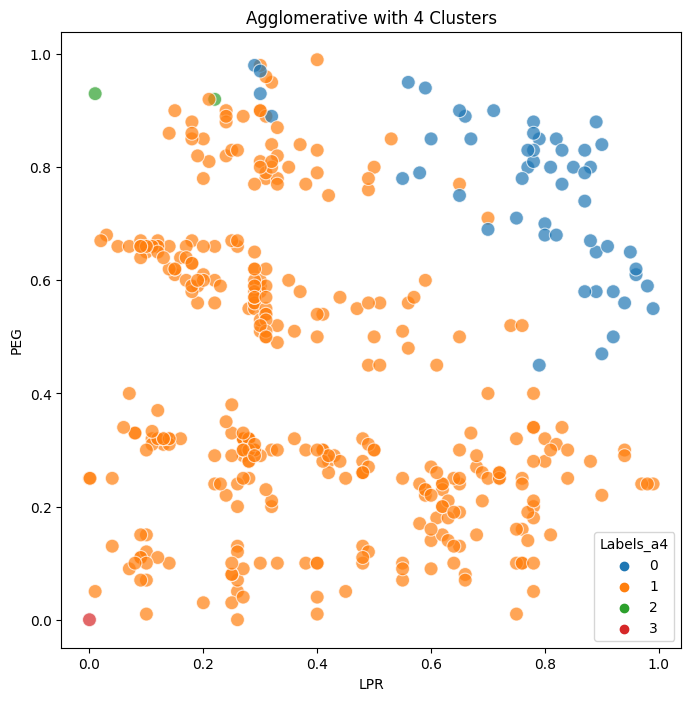

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


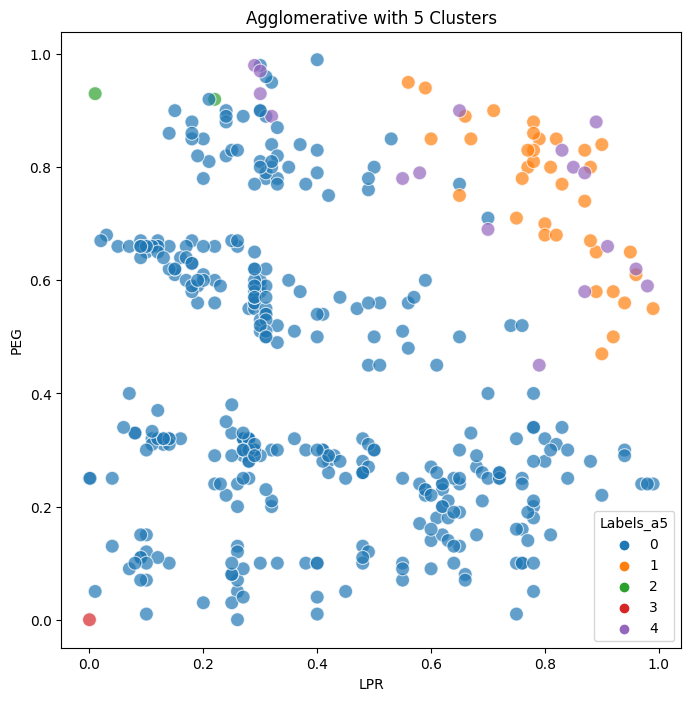

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


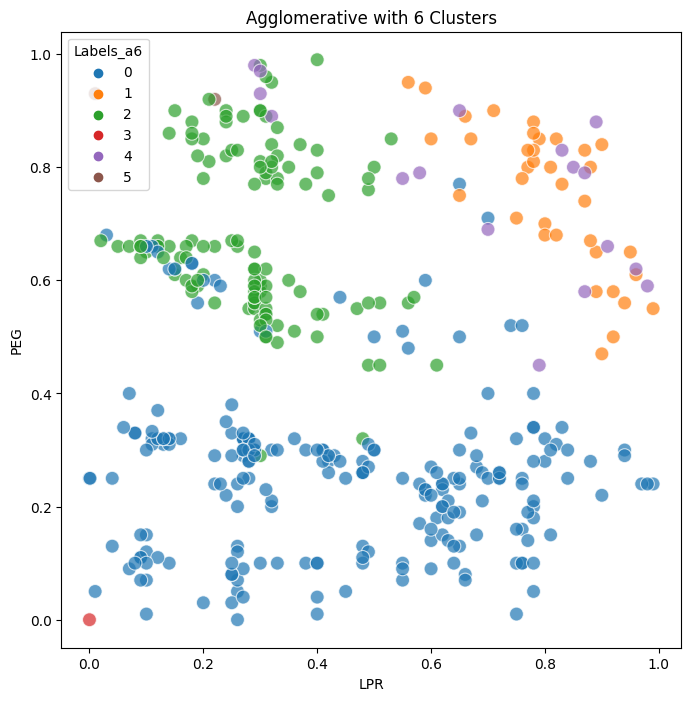

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


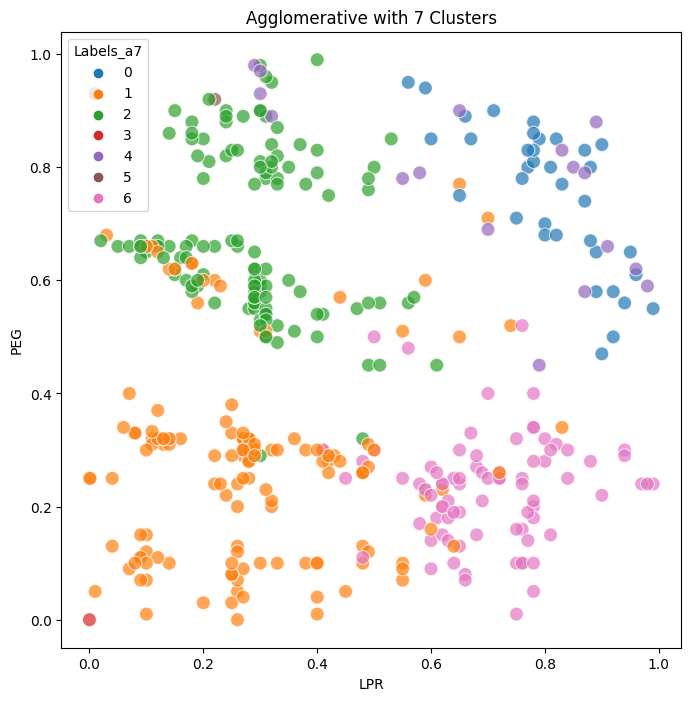

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


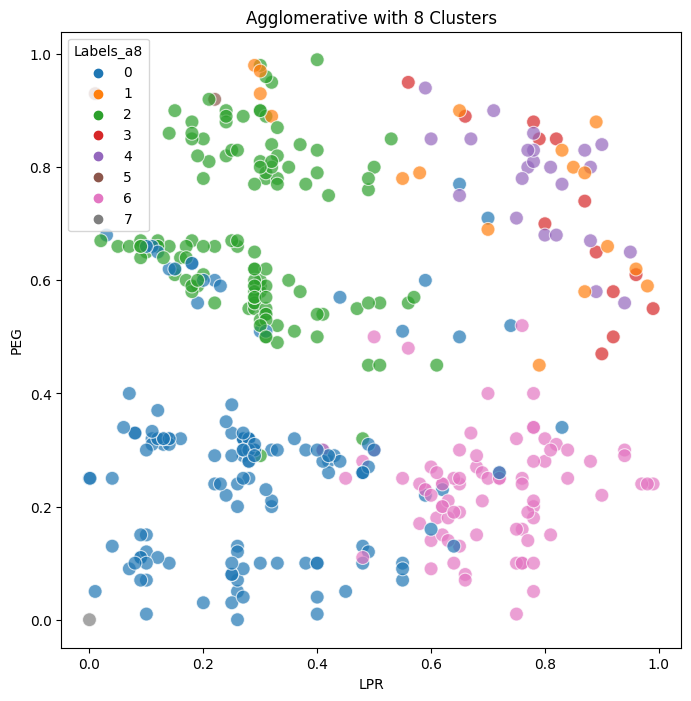

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


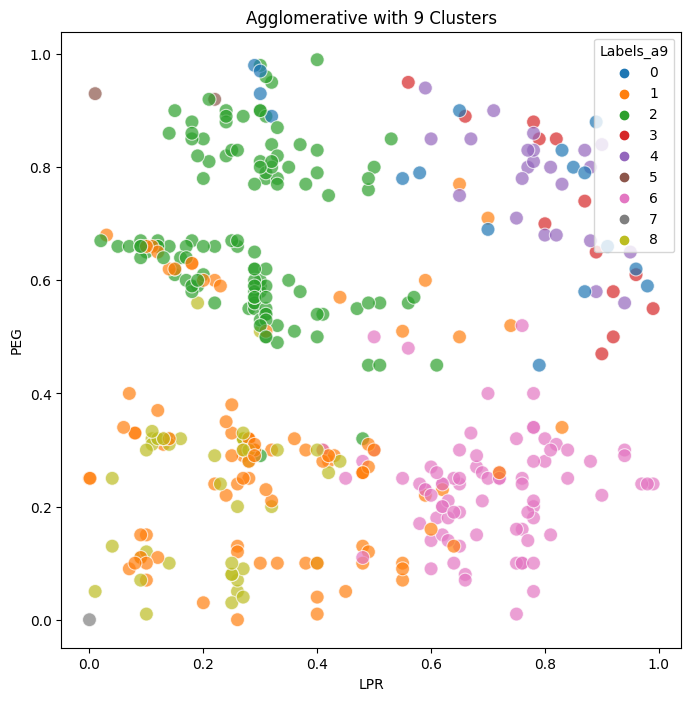

In [20]:
for n in range(4,10):
    make_cluster_with_agglomerative(data=data,cols=colsX,n=n,x1="LPR",x2="PEG")

## 3. Aplicando `DBSCAN`

In [21]:
def make_cluster_with_dbscan(data,cols,x1,x2,eps,min_samples):
    from sklearn.cluster import DBSCAN 
    
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(data[cols])

    n = np.unique(db.labels_).shape[0]

    labn = f'Labels_db_eps{eps}_mins{min_samples}'
    data[labn] = db.labels_
    plt.figure(figsize=(8, 8))
    g = sns.scatterplot(data[x1], data[x2], hue=data[labn], palette=sns.color_palette('tab10', n), s=100, alpha=0.7)
    plt.title(f'DBSCAN with epsilon {eps}, min sample {min_samples}, {n}')
    plt.show()
    return g

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


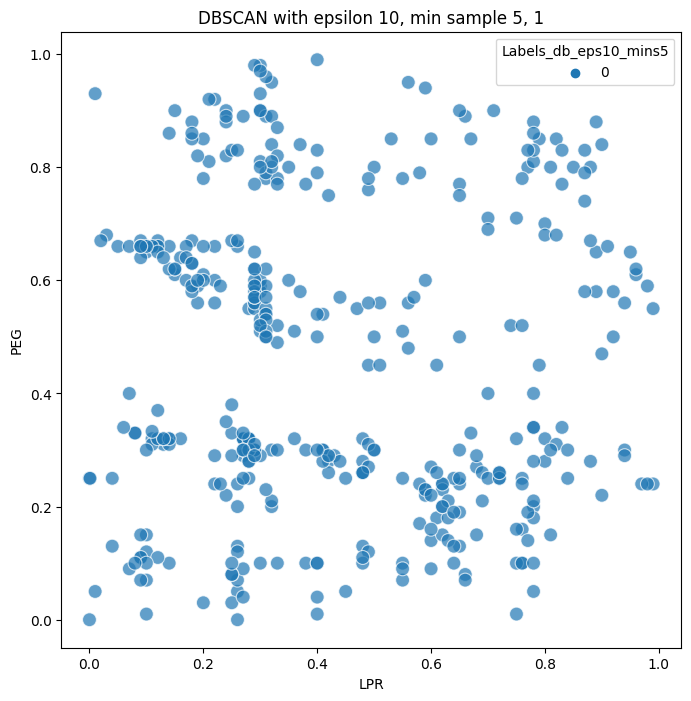

<AxesSubplot:title={'center':'DBSCAN with epsilon 10, min sample 5, 1'}, xlabel='LPR', ylabel='PEG'>

In [22]:
make_cluster_with_dbscan(data=data,cols=colsX,x1="LPR",x2="PEG", eps=10, min_samples=5)

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


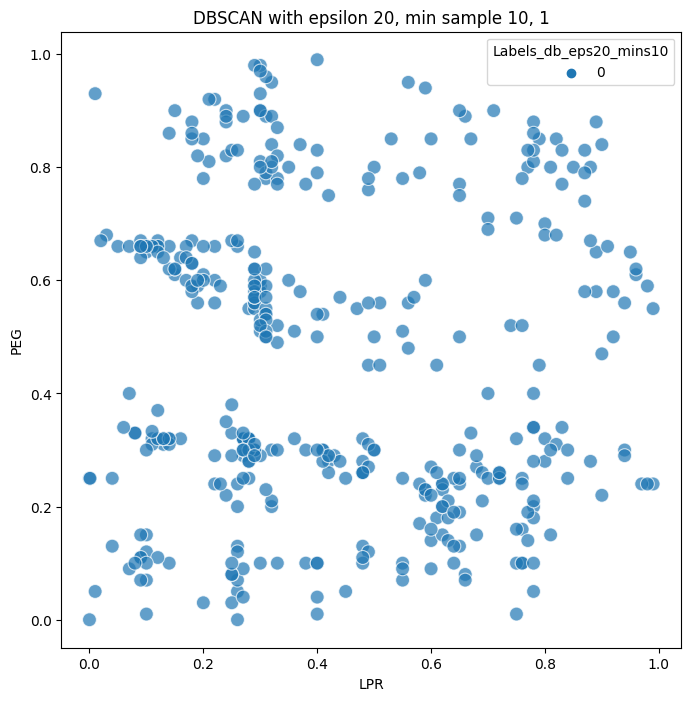

<AxesSubplot:title={'center':'DBSCAN with epsilon 20, min sample 10, 1'}, xlabel='LPR', ylabel='PEG'>

In [23]:
make_cluster_with_dbscan(data=data,cols=colsX,x1="LPR",x2="PEG", eps=20, min_samples=10)

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


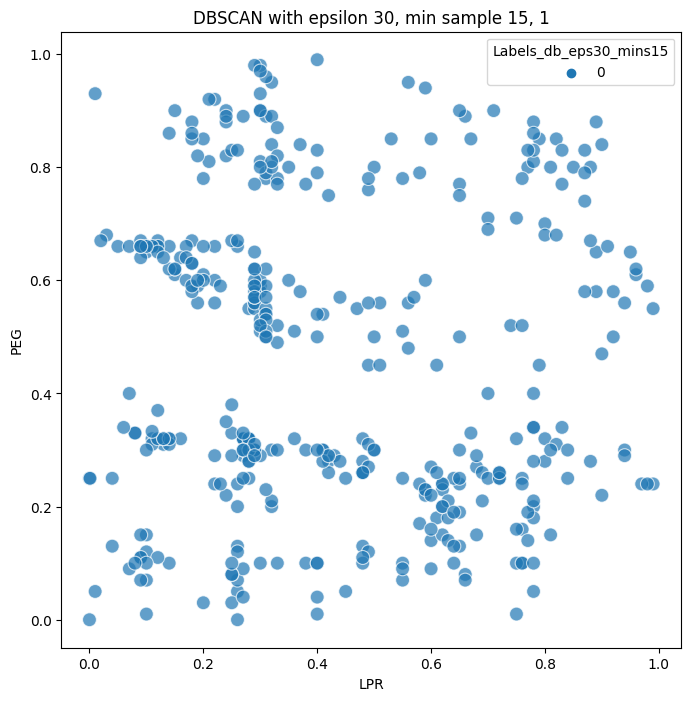

<AxesSubplot:title={'center':'DBSCAN with epsilon 30, min sample 15, 1'}, xlabel='LPR', ylabel='PEG'>

In [24]:
make_cluster_with_dbscan(data=data,cols=colsX,x1="LPR",x2="PEG", eps=30, min_samples=15)

## 4. Aplicando `Mean shift`

In [25]:
def make_cluster_with_mean_shift(data,cols,x1,x2,quantile):
    from sklearn.cluster import MeanShift, estimate_bandwidth

    bandwidth = estimate_bandwidth(data[cols], quantile=quantile, random_state=123)
    ms = MeanShift(bandwidth=bandwidth).fit(data[cols])

    n =  np.unique(ms.labels_).shape[0]

    labn = f'Labels_ms{quantile}'
    data[labn] = ms.labels_
    plt.figure(figsize=(8, 8))
    g = sns.scatterplot(data[x1], data[x2], hue=data[labn], palette=sns.color_palette('tab10', n), s=100, alpha=0.7)
    plt.title(f'MeanShift with q{quantile}')
    plt.show()
    return g

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


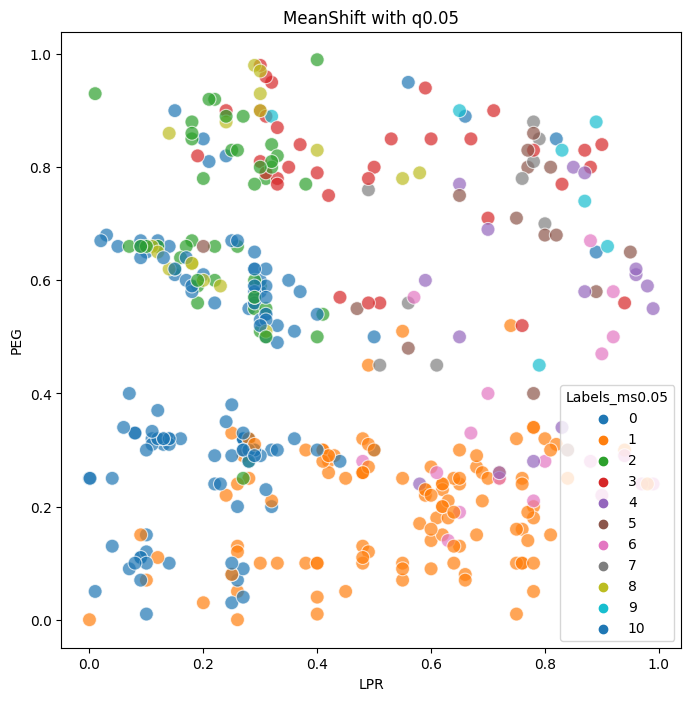

<AxesSubplot:title={'center':'MeanShift with q0.05'}, xlabel='LPR', ylabel='PEG'>

In [26]:
make_cluster_with_mean_shift(data=data,cols=colsX,x1="LPR",x2="PEG",quantile=0.05)

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


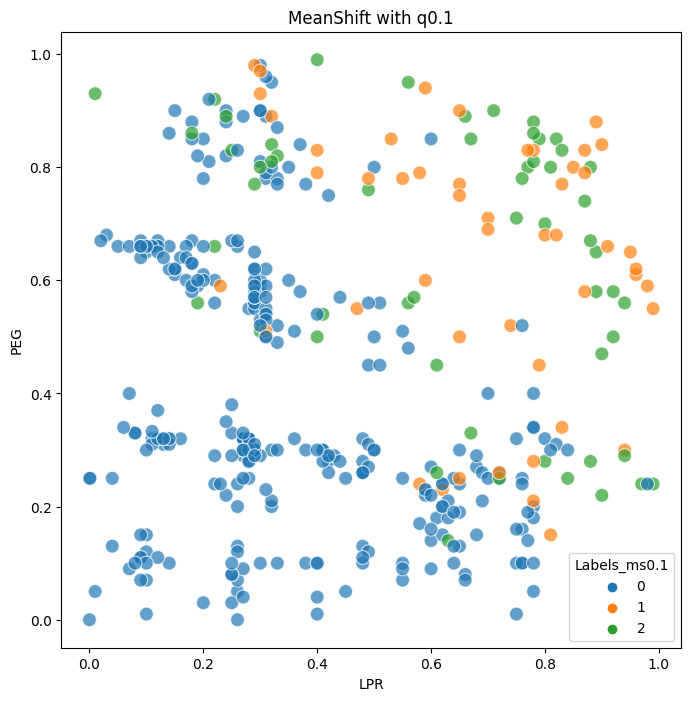

<AxesSubplot:title={'center':'MeanShift with q0.1'}, xlabel='LPR', ylabel='PEG'>

In [27]:
make_cluster_with_mean_shift(data=data,cols=colsX,x1="LPR",x2="PEG",quantile=0.1)

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


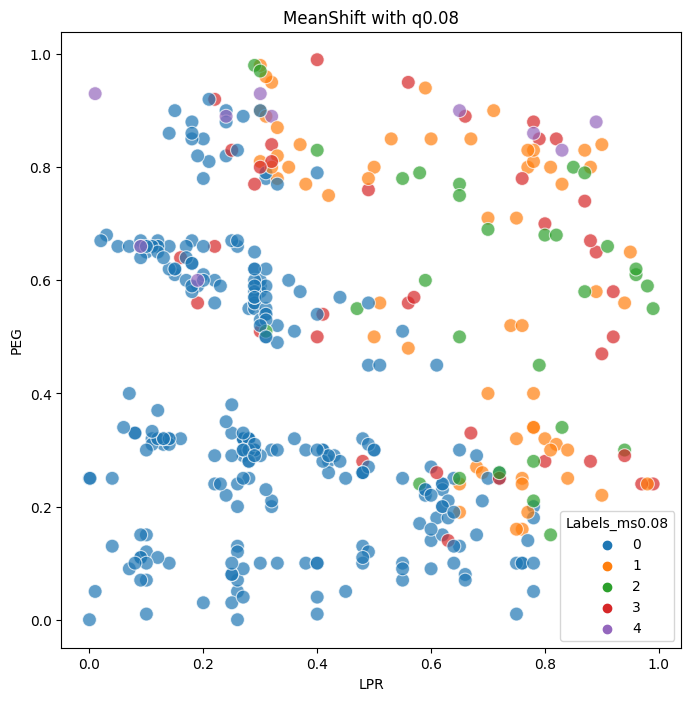

<AxesSubplot:title={'center':'MeanShift with q0.08'}, xlabel='LPR', ylabel='PEG'>

In [28]:
make_cluster_with_mean_shift(data=data,cols=colsX,x1="LPR",x2="PEG",quantile=0.08)

c:\Python\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


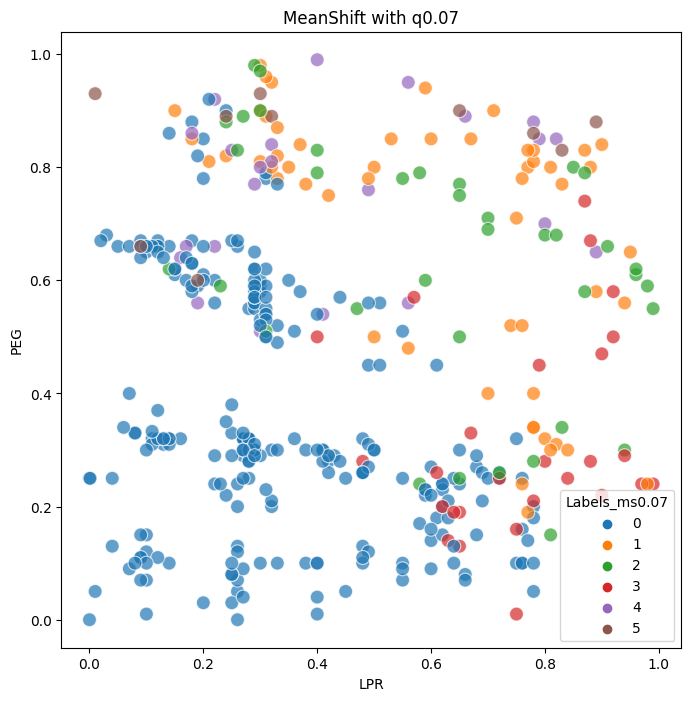

<AxesSubplot:title={'center':'MeanShift with q0.07'}, xlabel='LPR', ylabel='PEG'>

In [29]:
make_cluster_with_mean_shift(data=data,cols=colsX,x1="LPR",x2="PEG",quantile=0.07)

# Analisis de Resultados

Al implementar los 4 metodos se pudo evidenciar:


* `1. K-Means` el que mas se ajusto tras la validacion visualcon 4 clusters.
* `2. Cluster Jerarquico` mostro nodos aparte como si aparentemente no captara bien la relacion de los datos.
* `3. DBSCAN` no mostro ningun cluster, aparentemente no sirvio para los datos
* `4. Mena Shift` al aumentar el tamaño del cuartil se disminuyen los cluster pero siempre permanece un cluster mas marcados que los otros (azul)

En comparación con los metodos usados y la capacidad de ajuste y entendimiento del ajuste-costo computacional me parece que el que mejor se desempeña para este contexto es el de K-Means

## Resultado de los modelos

In [30]:
model_cols = [c for c in data if c not in colsX + [target]]

In [31]:
print("distribucion de elementos segun su clasificacion")
pd.DataFrame.from_dict(dict((x, dict(data[x].value_counts(normalize=True))) for x in [target]+model_cols)).sort_index().T

distribucion de elementos segun su clasificacion


,0,1,2,3,4,5,6,7,8,9,10
UNS,0.124069,0.320099,0.302730,0.253102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Labels_k4,0.141439,0.302730,0.337469,0.218362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Labels_k5,0.205955,0.178660,0.248139,0.143921,0.223325,NaN,NaN,NaN,NaN,NaN,NaN
Labels_k6,0.210918,0.168734,0.131514,0.176179,0.193548,0.119107,NaN,NaN,NaN,NaN,NaN
Labels_k7,0.099256,0.133995,0.101737,0.146402,0.171216,0.143921,0.203474,NaN,NaN,NaN,NaN
Labels_k8,0.101737,0.104218,0.104218,0.079404,0.076923,0.208437,0.138958,0.186104,NaN,NaN,NaN
Labels_k9,0.124069,0.076923,0.126551,0.153846,0.079404,0.111663,0.081886,0.124069,0.121588,NaN,NaN
Labels_a4,0.131514,0.861042,0.004963,0.002481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Labels_a5,0.861042,0.089330,0.004963,0.002481,0.042184,NaN,NaN,NaN,NaN,NaN,NaN
Labels_a6,0.555831,0.089330,0.305211,0.002481,0.042184,0.004963,NaN,NaN,NaN,NaN,NaN


Los modelos que podrian ser comparables son los que tienen al menos 4 categorias, El ejercicio de compararlo contra `UNS` es viciado, ya que el objetivo de estos modelos es generar los cluster, donde no se tienen.

## Comparacion de `K-Means` con `4-clusters`
Definitivamente el que mejor se desempeña con los datos es el de `K-Means` ya que se acerca en mayor medida a la distribucion de la clasificacion real `UNS`, se realiza una homologacion de labels a el de UNS por distribucion:

In [32]:
print("Labels_k4", "\t", dict(data['Labels_k4'].value_counts()))
print(f"Se van a llevar a la forma de {target}")
print(target, "\t\t", dict(data[target].value_counts()))
labels_Labels_k4 = dict(zip(data['Labels_k4'].value_counts().index, data[target].value_counts().index))
labels_Labels_k4


Labels_k4 	 {2: 136, 1: 122, 3: 88, 0: 57}
Se van a llevar a la forma de UNS
UNS 		 {1: 129, 2: 122, 3: 102, 0: 50}


{2: 1, 1: 2, 3: 3, 0: 0}

In [33]:
data['N_Labels_k4'] = data['Labels_k4'].map(labels_Labels_k4)
dict(data['N_Labels_k4'].value_counts())

{1: 136, 2: 122, 3: 88, 0: 57}

Matriz de confusion de datos `UNS` y resultados de `K-Means` con `4-clusters` homologados segun distribucion de `UMS`

In [34]:
pd.concat([
    pd.crosstab(data[target],data['N_Labels_k4'])
    , round(pd.crosstab(data[target],data['N_Labels_k4'], normalize=True) * 100,2)
], axis=1
)

N_Labels_k4,0,1,2,3,0,1,2,3
UNS,,,,,,,,
0,0,0,44,6,0.00,0.00,10.92,1.49
1,0,7,68,54,0.00,1.74,16.87,13.40
2,6,79,10,27,1.49,19.60,2.48,6.70
3,51,50,0,1,12.66,12.41,0.00,0.25


La matrix de confusion esta compuesta por **valores absolutos** y **frecuencias**, esta me muestra pocos valores en la diagonal lo que indicaria mala clasificacion de las categorias una vez homologadas a la distribucion de `UNS`

In [35]:
data.groupby([target,'N_Labels_k4'],dropna=False).size()

UNS  N_Labels_k4
0    2              44
     3               6
1    1               7
     2              68
     3              54
2    0               6
     1              79
     2              10
     3              27
3    0              51
     1              50
     3               1
dtype: int64

pocos valores son asignados correctamente en la clases

In [36]:
model_eval_kmeans = pd.concat(
                            [
                                data[target].value_counts().sort_index()
                                , data[target].value_counts(normalize=True).sort_index()
                                , data['N_Labels_k4'].value_counts().sort_index()
                                , data['N_Labels_k4'].value_counts(normalize=True).sort_index()
                            ], axis=1
                        )
model_eval_kmeans.columns = ['UNS','UNS%','N_Labels_k4','N_Labels_k4%']
model_eval_kmeans['diff'] = model_eval_kmeans['UNS'] - model_eval_kmeans['N_Labels_k4']
model_eval_kmeans['error'] = (model_eval_kmeans['N_Labels_k4']-model_eval_kmeans['UNS'])/model_eval_kmeans['UNS']
model_eval_kmeans

,UNS,UNS%,N_Labels_k4,N_Labels_k4%,diff,error
0,50,0.124069,57,0.141439,-7,0.140000
1,129,0.320099,136,0.337469,-7,0.054264
2,122,0.302730,122,0.302730,0,0.000000
3,102,0.253102,88,0.218362,14,-0.137255


## Metricas

Metricas de sklearn
https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019

In [37]:
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error

In [38]:
print('accuracy_score=', accuracy_score(data[target], data['N_Labels_k4']))
print('mean_absolute_percentage_error=', mean_absolute_percentage_error(data[target], data['N_Labels_k4']))

accuracy_score= 0.04466501240694789
mean_absolute_percentage_error= 1184569629035416.2


Al compara el valor de `UMS` vs el resultado de k-means con 4 clusters, ajustando los labes segun la distribucion `N_Labels_k4` obtenemos un *Acuraccy=0.0446* lo que es consistente con lo visto en la matriz de contingencia o matriz de confusion, donde los efectivamente clasificados fueron 18 elementos de los 403 items.